# Proyecto: Análisis de Rendimiento de Estudiantes en Exámenes

## 1. Descripción del Dataset

El conjunto de datos **"Students Performance in Exams"** contiene información sobre el rendimiento académico de los estudiantes en tres materias principales: Matemáticas, Lectura y Escritura. Incluye variables demográficas como género, educación de los padres y participación en cursos de preparación.

## 2. Objetivo del Análisis

El objetivo de este análisis es explorar cómo diferentes factores (como género, educación de los padres y la preparación previa) afectan el rendimiento en los exámenes de los estudiantes.


## 3. Proceso de Limpieza de los Datos

### 3.1. Carga del Dataset

In [93]:
#Importamos las libreria de Pandas 
import pandas as pd
from io import StringIO 
from ydata_profiling import ProfileReport

#### Se utilizara la función set_option de Pandas para pasar por el parametro "display.precision" la cantidad de 2 decimales 

In [36]:
pd.set_option("display.precision", 2)
pd.options.display.float_format = '{:.2f}'.format

#### Cargar el dataset

In [ ]:
df = pd.read_csv("./Data/StudentsPerformance.csv")

#### Mostrar las primeras filas del dataset

In [35]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### 3.2. Iniciando exploración 

In [28]:
# Ver la información general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


**Como se puede observar no hay valores nulos, son 3 de tipo entero y 6 de tipo objeto que practicamente representan a una cadena de caracteres** 
- **Se procedera a cambiarle el nombre a las columnas** 

In [38]:
df = df.rename(columns={"gender":"Genero",
                        "race/ethnicity":"Categoria_grupos",
                        "parental level of education":"Nivel_Educacion_Padres",
                        "lunch":"Almuerzo_estudiante",
                        "test preparation course":"Completo_curso_preparacion",
                        "math score":"Nota_examen_matematicas",
                        "reading score":"Nota_examen_Lectura",
                        "writing score":"Nota_examen_Escritura"})

##### Se procedera a renombrara lo siguiente: 
- **El genero del estudiante** 
- **El Nivel de eduación de los Padre**
- **El almuerzo del estudiante**
- **El estudiante completo el curso de preparacion**

In [52]:
df["Genero"] = df["Genero"].replace({"female":"F","male":"M"})

In [44]:
df["Nivel_Educacion_Padres"] = df["Nivel_Educacion_Padres"].replace({
    "some high school": "algunos estudios de secundaria",
    "high school": "secundaria completa",
    "some college": "algunos estudios universitarios",
    "associate\'s degree": "título de grado asociado",
    "bachelor\'s degree": "título universitario",
    "master\'s degree": "título de maestría"
})

In [43]:
df["Almuerzo_estudiante"] = df["Almuerzo_estudiante"].replace({
    "standard": "almuerzo comun",
    "free/reduced": "almuerzo gratis/reducido"
})

In [49]:
df["Completo_curso_preparacion"] = df["Completo_curso_preparacion"].replace({
    "none": "No",
    "completado": "Si"
})

#### Data con los cambios realizados

In [53]:
df.head()

,Genero,Categoria_grupos,Nivel_Educacion_Padres,Almuerzo_estudiante,Completo_curso_preparacion,Nota_examen_matematicas,Nota_examen_Lectura,Nota_examen_Escritura
0,F,group B,título universitario,almuerzo comun,No,72,72,74
1,F,group C,algunos estudios universitarios,almuerzo comun,Si,69,90,88
2,F,group B,título de maestría,almuerzo comun,No,90,95,93
3,M,group A,título de grado asociado,almuerzo gratis/reducido,No,47,57,44
4,M,group C,algunos estudios universitarios,almuerzo comun,No,76,78,75


### Diccionario de Variables

| Nombre de la Variable           | Tipo de Dato | Descripción                                                                                  |
|---------------------------------|--------------|----------------------------------------------------------------------------------------------|
| **Genero**                      | Cadena   | Género del estudiante                          |
| **Categoria_grupos**              | Cadena   | Grupo étnico del estudiante. Las categorías son 'group A', 'group B', 'group C', 'group D', 'group E'. |
| **Nivel_Educacion_Padres** | Cadena   | Nivel de educación de los padres. Las opciones son: 'algunos estudios de secundaria', 'secundaria completa', 'algunos estudios universitarios', 'titulo de grado asociado', 'titulo universitario', 'titulo de maestria'. |
| **Almuerzo_estudiante**                       | Cadena   | Tipo de almuerzo del estudiante. Puede ser almuerzo comun o almuerzo gratis/reducido |
| **Completo_curso_preparacion**     | Cadena   | Indica si el estudiante completó un curso de preparación para el examen. Puede ser No o Si. |
| **Nota_examen_matematicas**                  | Entero     | Puntuación del estudiante en el examen de Matemáticas (de 0 a 100).                              |
| **Nota_examen_Lectura**               | Entero     | Puntuación del estudiante en el examen de Lectura (de 0 a 100). |
| **Nota_examen_Escritura**               | Entero     | Puntuación del estudiante en el examen de Escritura (de 0 a 100). |



#### Resumen estadístico del dataset

In [51]:
df.describe()

,Nota_examen_matematicas,Nota_examen_Lectura,Nota_examen_Escritura
count,1000.00,1000.00,1000.00
mean,66.09,69.17,68.05
std,15.16,14.60,15.20
min,0.00,17.00,10.00
25%,57.00,59.00,57.75
50%,66.00,70.00,69.00
75%,77.00,79.00,79.00
max,100.00,100.00,100.00


- **Se puede observar que la cantidad de estudiantes son 1000**
- **Adicional se observa que la media mas baja de los 3 examenes realizados es el de matematicas y en cuando a las desviancion estandar (std) matematicas es el que indica mas dispersion con respecto a la nota del examen**
- **La nota minima mas alta le corresponde a las notas obtenidas de los examenes de Lectura**
- **En las 3 materias hubieron calificaciones que llegaron a 100**

### 4. Análisis Exploratorio de Datos (EDA)
#### 4.1. Distribución de Notas
**Analizaremos las distribuciones de las notas en Matemáticas, Lectura y Escritura.**

In [61]:
#Antes de todo exportaremos las Librerias necesarias para los objetos visuales
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

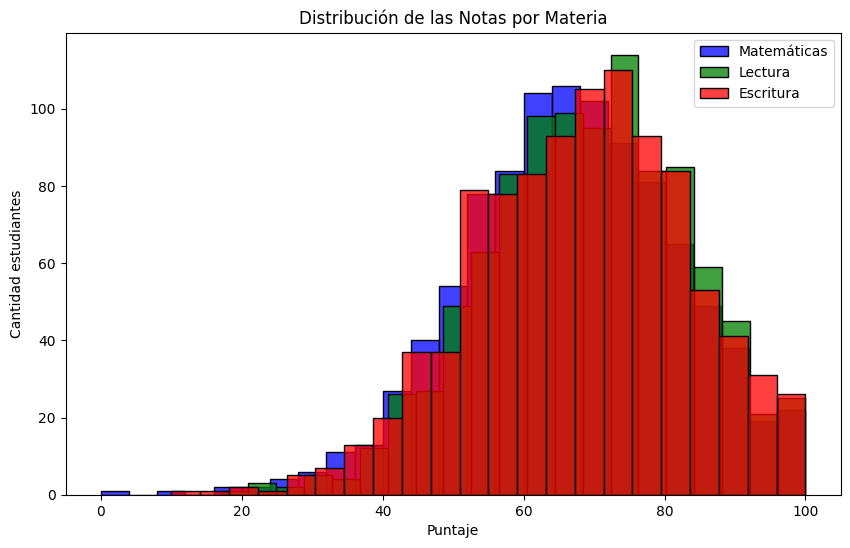

In [79]:
plt.figure(figsize=(10,6))
sns.histplot(df["Nota_examen_matematicas"], color="blue", label="Matemáticas")
sns.histplot(df["Nota_examen_Lectura"], color="green", label="Lectura")
sns.histplot(df["Nota_examen_Escritura"], color="red", label="Escritura")
plt.title("Distribución de las Notas por Materia")
plt.ylabel("Cantidad estudiantes")
plt.xlabel("Puntaje")
plt.legend()
plt.show()

- **Los estudiantes han tenido mejores calificaciones en Lectura**
- **Matematicas es la materia donde los estudiantes salen mas afectados**

#### 4.2 Correlacion entre las materias

In [69]:
Notas_Matematicas = df["Nota_examen_matematicas"].to_numpy()
Notas_Lectura = df["Nota_examen_Lectura"].to_numpy()
Notas_Escritura = df["Nota_examen_Escritura"].to_numpy()

notas_apiladas = np.vstack((Notas_Matematicas, Notas_Lectura, Notas_Escritura))

Correlacion_matriz = np.corrcoef(notas_apiladas)
print("Matriz de correlacion:")
print(Correlacion_matriz)

Matriz de correlacion:
[[1.         0.81757966 0.80264205]
 [0.81757966 1.         0.95459808]
 [0.80264205 0.95459808 1.        ]]


**Correlacion entre Matematicas y Lectura:** 
##### 0.8176 (aproximadamente). Esto indica una fuerte correlación positiva. Esto significa que, en general, los estudiantes que obtienen altas puntuaciones en matematicas tienden a obtener altas puntuaciones en lectura.

**Correlacion entre Matematicas y Escritura:** 
##### 0.8026 (aproximadamente). Esto también muestra una fuerte correlación positiva, sugiriendo que el desempeño en matematicas esta relacionado con el desempeño en escritura.

**Correlacion entre Lectura y Escritura:** 
##### 0.9546 (aproximadamente). Este es un valor muy alto y sugiere una correlación extremadamente fuerte. Esto implica que los estudiantes que son buenos en lectura tienden a ser también muy buenos en escritura.



#### 4.3. Comparación entre Género y Rendimiento
**Comparacion de Matematicas por Genero**



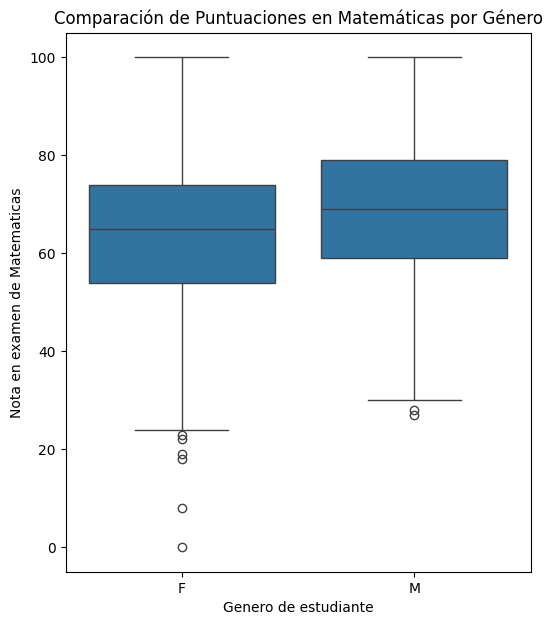

In [78]:
plt.figure(figsize=(6,7))
sns.boxplot(x="Genero", y="Nota_examen_matematicas", data=df)
plt.title("Comparación de Puntuaciones en Matemáticas por Género")
plt.xlabel("Genero de estudiante")
plt.ylabel("Nota en examen de Matematicas")
plt.show()

- **El valor minimo en cuanto al genero Femenino ronda entre notas de 23 a un poco mas de 50**
- **El segundo cuartil ya llega a un poco mas de 60 o menos ya que la mediana y o un porcentaje considerado de estudiantes de Genero Femenino tiene notas por encima de 60**
- **Luego el tercer cuartil no llega no alcanza a llegar a 80**
- **En cuanto al Genero Masculino se puede observar que tiene notas un poco mas elevadas y la dispersion es menor**

#### 4.4. Efecto de la Educación de los Padres
**Se agrupo por nivel de educación a los padres junto al promedio de Notas obtenidas**

In [88]:
Nivel_Educacion_Padres = df.groupby("Nivel_Educacion_Padres")[["Nota_examen_matematicas","Nota_examen_Lectura","Nota_examen_Escritura"]].mean()
Nivel_Educacion_Padres

,Nota_examen_matematicas,Nota_examen_Lectura,Nota_examen_Escritura
Nivel_Educacion_Padres,,,
algunos estudios de secundaria,63.50,66.94,64.89
algunos estudios universitarios,67.13,69.46,68.84
secundaria completa,62.14,64.70,62.45
título de grado asociado,67.88,70.93,69.90
título de maestría,69.75,75.37,75.68
título universitario,69.39,73.00,73.38


- **Los estudiantes cuyos padres tienen un mayor nivel de educación tienden a obtener mejores resultados en todas las materias.**

#### 4.5. Efecto de la Preparación para el Test
**Comparación entre estudiantes que completaron el curso de preparación y los que no**

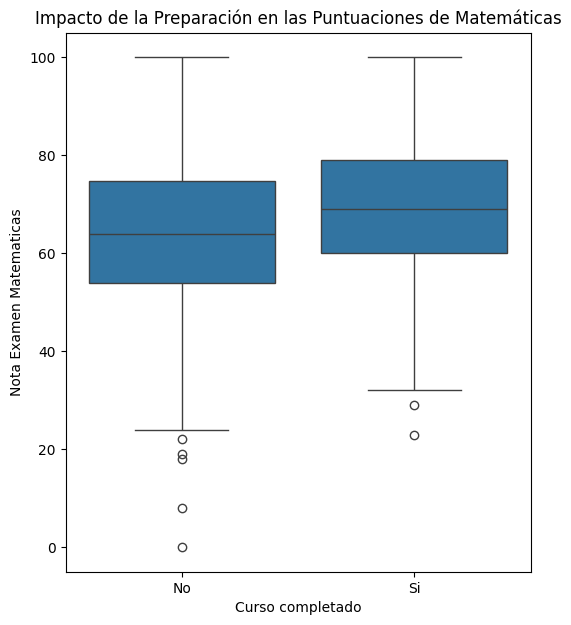

In [91]:
plt.figure(figsize=(6,7))
sns.boxplot(x='Completo_curso_preparacion', y='Nota_examen_matematicas', data=df)
plt.title("Impacto de la Preparación en las Puntuaciones de Matemáticas")
plt.xlabel("Curso completado")
plt.ylabel("Nota Examen Matematicas")
plt.show()

- **Segun el Boxplot la diferencia es un poco significativa en cuando a la dispersion de las notas si un estudiante no completo el curso de preparacion**
- **En ambos casos se alcanzo la nota maxima pero el dato de anomalias es mas grande en los casos donde no se completo el curso de preparacion**

#### Obtener Analisis exploratorio ejecundo una sola linea de codigo 

In [94]:
profile = ProfileReport(df)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### 5. Conclusiones
#### Principales Hallazgos:
- **Las puntuaciones en Matemáticas tienen una distribución ligeramente sesgada hacia la derecha, mientras que las puntuaciones en Lectura y Escritura son más simétricas.**
- **Las mujeres tienden a obtener mejores puntajes en Lectura y Escritura, mientras que los hombres sobresalen ligeramente en Matemáticas.**
- **Los estudiantes cuyos padres tienen un mayor nivel de educación tienden a obtener mejores resultados en todas las materias.**
- **Completar un curso de preparación para el examen tiene un impacto positivo en los puntajes de los estudiantes.**

### Próximos Pasos:
#### Explorar el impacto de otras variables como el tiempo dedicado al estudio o la participación en actividades extracurriculares.
#### Aplicar modelos predictivos para intentar predecir los puntajes basados en factores demográficos y socioeconómicos.